In [1]:
import os
os.chdir('..')

import numpy as np
import modules.importer as imp
import matplotlib.pyplot as pyp


URM_matrix = imp.create_URM()

number_users = URM_matrix.shape[0]
number_items = URM_matrix.shape[1]

print("Number of users:\t {},\nNumber of items:\t {}\n"\
      .format(number_users, number_items))

Number of users:	 50446,
Number of items:	 20635



In [16]:
item_number_interaction = np.array(np.sum(URM_matrix, axis = 0)).squeeze()
user_number_interaction = np.array(np.sum(URM_matrix, axis = 1)).squeeze()
total_number_interactions = np.sum(user_number_interaction)

print("Sparsity: {:.2f}%".format((1 - (total_number_interactions / (number_users * number_items))) * 100))

Sparsity: 99.88%


# Item interaction statistics

In [23]:
# item interaction  
avg_interaction_item = np.average(item_number_interaction)
max_interaction_item = np.max(item_number_interaction)
min_interaction_item = np.min(item_number_interaction)
std_interaction_item = np.std(item_number_interaction)

interaction_item_sorted = np.sort(item_number_interaction)[::-1]
interaction_item_percentile = np.percentile(item_number_interaction, [25, 50, 75, 90])

zero_interaction_item = np.where(item_number_interaction == 0)[0]
id_min_interaction_item = np.where(item_number_interaction == min_interaction_item)[0]

number_zero_interaction_item = len (zero_interaction_item)
number_min_interaction_item = len (id_min_interaction_item)

top_interaction_item = interaction_item_sorted[:int(0.1*number_items)]
avg_top_interaction_item = np.average(top_interaction_item)

print ("Item interaction statistics\n")
print ("Average interactions x item:\t {:.2f}".format(avg_interaction_item))
print ("Max interaction x item:\t {},\nMin interaction x item:\t {},\nStandard deviation:\t {}".\
       format(max_interaction_item, min_interaction_item, std_interaction_item))
print ("\nPercentiles:\n25%:\t {},\n50%:\t {},\n75%:\t {},\n90%:\t {}\n".\
       format(interaction_item_percentile[0],interaction_item_percentile[1],\
              interaction_item_percentile[2],interaction_item_percentile[3] ))
print ("Number of items with zero interaction:\t {},\tPercentage: {:2f}%".\
       format(number_zero_interaction_item, (number_zero_interaction_item / number_items)*100))
print ("Number of items with min interaction:\t {},\tPercentage: {:2f}%".\
       format(number_min_interaction_item, (number_min_interaction_item / number_items)*100))
print ("\nNumber of top interaction per items:\t {},\tAverage interaction: {:2f}".\
       format(top_interaction_item.shape[0], avg_top_interaction_item))

Item interaction statistics

Average interactions x item:	 58.73
Max interaction x item:	 1785,
Min interaction x item:	 1,
Standard deviation:	 119.94394212435778

Percentiles:
25%:	 4.0,
50%:	 15.0,
75%:	 56.0,
90%:	 157.0

Number of items with zero interaction:	 0,	Percentage: 0.000000%
Number of items with min interaction:	 2538,	Percentage: 12.299491%

Number of top interaction per items:	 2063,	Average interaction: 341.308289


### Distribution of Interaction x items

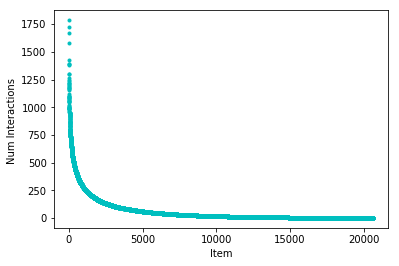

In [24]:
pyp.plot(interaction_item_sorted, 'c.')
pyp.ylabel('Num Interactions ')
pyp.xlabel('Item')
pyp.show()

# User interaction statistics

In [25]:
# user interaction  
avg_iteraction_user = np.average(user_number_interaction)
max_interaction_user = np.max(user_number_interaction)
min_interaction_user = np.min(user_number_interaction)
std_interaction_user = np.std(user_number_interaction)

interaction_user_sorted = np.sort(user_number_interaction)
interaction_user_percentile = np.percentile(user_number_interaction, [25, 50, 75, 90])

zero_interaction_user = np.where(user_number_interaction == 0)[0]
id_min_interaction_user = np.where(user_number_interaction == min_interaction_user)[0]

number_zero_interaction_user = len (zero_interaction_user)
number_min_interaction_user = len (id_min_interaction_user)

top_interaction_user = np.array(interaction_user_sorted[int(number_users * 0.9):])
avg_top_interaction_user = np.average(top_interaction_user)

print ("User interaction statistics\n")
print ("Average interactions x user {:.2f}".format(avg_iteraction_user))
print ("Max interaction x user:\t {},\nMin interaction x user:\t {},\nStandard deviation:\t {}".\
       format(max_interaction_user, min_interaction_user, std_interaction_user))
print ("\nPercentiles:\n25%:\t {},\n50%:\t {},\n75%:\t {},\n90%:\t {}\n".\
       format(interaction_user_percentile[0],interaction_user_percentile[1],\
              interaction_user_percentile[2],interaction_user_percentile[3]))
print ("Number of users with zero interaction:\t {},\tPercentage: {:2f}%".\
       format(number_zero_interaction_user, (number_zero_interaction_user / number_users)*100))
print ("Number of users with min interaction:\t {},\tPercentage: {:2f}%".\
       format(number_min_interaction_user, (number_min_interaction_user / number_users)*100))
print ("\nNumber of top interaction per user:\t {},\tAverage interaction: {:2f}".\
       format(top_interaction_user.size, avg_top_interaction_user))

User interaction statistics

Average interactions x user 24.02
Max interaction x user:	 100,
Min interaction x user:	 5,
Standard deviation:	 16.114784206509434

Percentiles:
25%:	 11.0,
50%:	 20.0,
75%:	 33.0,
90%:	 48.0

Number of users with zero interaction:	 0,	Percentage: 0.000000%
Number of users with min interaction:	 1788,	Percentage: 3.544384%

Number of top interaction per user:	 5045,	Average interaction: 58.782359


### Distribution of Interaction x users

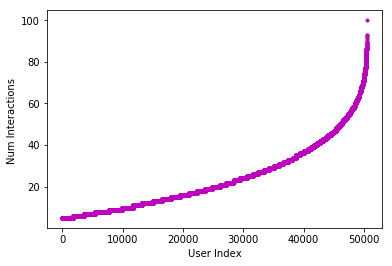

In [26]:
pyp.plot(interaction_user_sorted, 'm.')
pyp.ylabel('Num Interactions ')
pyp.xlabel('User Index')
pyp.show()